In [1]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [2]:
mercari_df = pd.read_csv("/content/drive/MyDrive/ml-data/Mercari-Price/train.tsv", sep="\t")
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [3]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


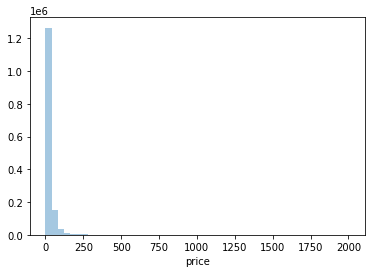

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df = mercari_df['price']
plt.figure(figsize=(6, 4))
sns.distplot(y_train_df, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


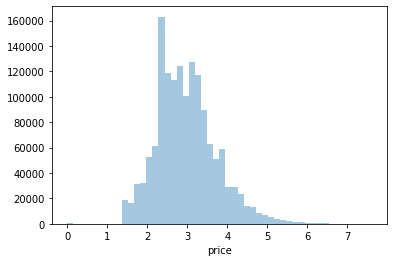

In [5]:
import numpy as np

y_train_df = np.log1p(y_train_df)
sns.distplot(y_train_df, kde=False)

In [6]:
mercari_df['price'] = np.log1p(mercari_df['price'])
mercari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [7]:
print(mercari_df['shipping'].value_counts())
print(mercari_df['item_condition_id'].value_counts())

0    819435
1    663100
Name: shipping, dtype: int64
1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [8]:
boolean_cond = mercari_df['item_description'] == "No description yet"
mercari_df[boolean_cond]['item_description'].count()

82489

In [9]:
def split_cat(category_name):
  try:
    return category_name.split("/")
  except:
    return ["Other_Null", "Other_Null", "Other_Null"]

mercari_df['cat_top'], mercari_df['cat_mid'], mercari_df['cat_bot'] = \
  zip(*mercari_df['category_name'].apply(lambda x : split_cat(x)))

In [10]:
print(mercari_df['cat_top'].value_counts())
print("========")
print(mercari_df['cat_mid'].value_counts())
print("========")
print(mercari_df['cat_bot'].value_counts())

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_top, dtype: int64
Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: cat_mid, Length: 114, dtype: int64
Pants, Tights, Leggings    60177
Other                      50224
Face                       50171
T-Shirts                   46380
Shoes                      32168
                           ...  
Garbage Disposals            

In [11]:
mercari_df['brand_name'] = mercari_df['brand_name'].fillna(value="Other_Null")
mercari_df['category_name'] = mercari_df['category_name'].fillna(value="Other_Null")
mercari_df['item_description'] = mercari_df['item_description'].fillna(value="Other_Null")

In [12]:
mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_top              0
cat_mid              0
cat_bot              0
dtype: int64

In [13]:
mercari_df['brand_name'].nunique()

4810

In [14]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1482535 non-null  object 
 4   brand_name         1482535 non-null  object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482535 non-null  object 
 8   cat_top            1482535 non-null  object 
 9   cat_mid            1482535 non-null  object 
 10  cat_bot            1482535 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 124.4+ MB


----

 0   train_id             
 1   name              : CountVectorizer  
 2   item_condition_id : one-hot  
 3   category_name     : 
 4   brand_name        : one-hot  
 5   price             :   
 6   shipping          : one-hot  
 7   item_description  : tfidfVectorizer  
 8   cat_top           : one-hot  
 9   cat_mid           : one-hot  
 10  cat_bot           : one-hot  

 ----

In [15]:
X_name = CountVectorizer().fit_transform(mercari_df['name'])
X_descp = TfidfVectorizer(max_features=50000, ngram_range=(1, 3), stop_words='english').fit_transform(mercari_df['item_description'])

print(X_name.shape)
print(X_descp.shape)

(1482535, 105757)
(1482535, 50000)


In [17]:
from sklearn.preprocessing import LabelBinarizer

X_brand_name = LabelBinarizer(sparse_output=True).fit_transform(mercari_df['brand_name'])
X_item_cond_id = LabelBinarizer(sparse_output=True).fit_transform(mercari_df['item_condition_id'])
X_shipping = LabelBinarizer(sparse_output=True).fit_transform(mercari_df['shipping'])

X_cat_top = LabelBinarizer(sparse_output=True).fit_transform(mercari_df['cat_top'])
X_cat_mid = LabelBinarizer(sparse_output=True).fit_transform(mercari_df['cat_mid'])
X_cat_bot = LabelBinarizer(sparse_output=True).fit_transform(mercari_df['cat_bot'])

In [18]:
from scipy.sparse import hstack
import gc

sparse_matrix_list = (X_name, X_descp, X_brand_name, X_item_cond_id, X_shipping, X_cat_top, X_cat_mid, X_cat_bot)

In [19]:
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


548

In [27]:
def rmsle(y, y_pred):
  n_ = len(y_pred)
  return np.sqrt(np.sum(np.square(np.log1p(y) - np.log1p(y_pred))) / n_)

def evaluate_org_price(y_test, preds):
  y_test_ex = np.expm1(y_test)
  preds_ex = np.expm1(preds)

  rmsle_result = rmsle(y_test_ex, preds_ex)
  return rmsle_result

In [30]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
  X = hstack(matrix_list).tocsr()

  X_train, X_test, y_train, y_test = train_test_split(X, mercari_df['price'], test_size=0.2, random_state=156)

  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  del X, X_train, X_test, y_train
  gc.collect()
  return preds, y_test

In [32]:
linear_model = Ridge(solver='lsqr', fit_intercept=False)
sparse_matrix_list = (X_name, X_brand_name, X_item_cond_id, X_shipping, X_cat_top, X_cat_mid, X_cat_bot)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print(evaluate_org_price(y_test, linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand_name, X_item_cond_id, X_shipping, X_cat_top, X_cat_top, X_cat_bot)
linear_preds, y_test = model_train_predict(model=linear_model, matrix_list=sparse_matrix_list)
print(evaluate_org_price(y_test, linear_preds))

0.5023727038010556
0.4722473084588253


In [36]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand_name, X_item_cond_id, X_shipping, X_cat_top, X_cat_top, X_cat_bot)
lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156, n_jobs=-1)
lgbm_preds, y_test = model_train_predict(model=lgbm_model, matrix_list=sparse_matrix_list)
print(evaluate_org_price(y_test, lgbm_preds))

0.4594036744553486


In [37]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print(evaluate_org_price(y_test, preds))

0.45239501148995104
